# 6. Logistic Regression

Binary Classification is very useful
- Spent N hours for study ==> Pass or Fail ?
- GPA and GRE scores for entering Graduate School ==> admit or not?
- Soccer game againt to othe country ==> win or loss?

### Linear Regression to Logistic Regression

Linear Model 
$$ \hat{y} = w * x + b $$
Logistic Model
$$ \hat{y} = \sigma ( w * x + b ) $$
where, $\sigma( )$ is sigmoid function that gives value between 0 and 1.


### Sigmoid Function
$$ \sigma (z) = { 1 \over 1 + e^{-z}} $$

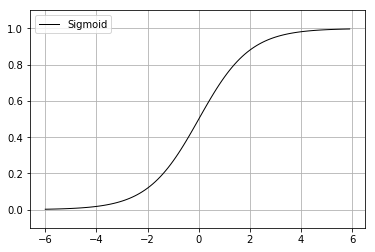

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-6.0, 6.0, 0.1)
y = sigmoid(x)
plt.plot(x, y, label='Sigmoid', color='k', lw=1, linestyle=None)
plt.ylim(-0.1, 1.1)
plt.grid()
plt.legend()
plt.show()

### MSE( Mean Square Error ) vs CEE( Cross Entropy Error )

**MSE**
$$ error = { {1 \over N} \sum_{n=1}^N (\hat{y}_n - y_n)^2 } $$
**Cross-Entropy**
$$ error = -{1 \over N} [ y_n \log \hat{y}_n  + (1-y_n)\log(1-\hat{y}_n  )]$$

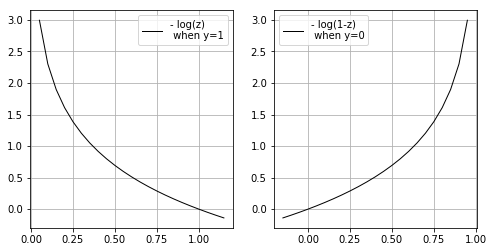

In [7]:
import math

def logarithm(x):
    return np.log(x)

x1 = np.arange(.05, 1.2, 0.05)
x2 = np.arange(-0.15, 0.995, 0.05)

y1 = -logarithm(x1)
y2 = -logarithm(1-x2)

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8, 4))

axes[0].plot(x1,y1, label='- log(z) \n when y=1', color='k', lw=1, linestyle=None)
#axes[0].ylim(-2.5, 0.2)
axes[0].grid()
axes[0].legend()

axes[1].plot(x2,y2, label='- log(1-z) \n when y=0', color='k', lw=1, linestyle=None)
#axes[1].ylim(-2.5, 0.2)
axes[1].grid()
axes[1].legend()

plt.show()


### Logistic regression in PyTorch

In [4]:
import torch
from torch.autograd import Variable

x_data = Variable(torch.Tensor([[1.0], [1.5], [2.0], [3.0], [3.5], [4.0]]))
y_data = Variable(torch.Tensor([[0.], [0.], [0.], [1.], [1.], [1.]]))

class Model(torch.nn.Module): 
    
    def __init__(self):
        super(Model,self).__init__()
        self.linear = torch.nn.Linear(1,1)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model()

# criterion = torch.nn.BCELoss(reduction='elementwise_mean')
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    if epoch%100 == 0:
        #print(epoch, loss.item())
        print(epoch, loss.data[0])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
hour_var = Variable(torch.Tensor([[1.0]]))
print("predict 1 hour =>", model(hour_var).data[0][0] > 0.5)
hour_var = Variable(torch.Tensor([[7.0]]))
print("predict 7 hour =>", model(hour_var).data[0][0] > 0.5)        

0 0.7360543608665466
100 0.5678632855415344
200 0.5352119207382202
300 0.5153194069862366
400 0.49713051319122314
500 0.4800914227962494
600 0.4641024172306061
700 0.4490858018398285
800 0.43496963381767273
900 0.4216874837875366
predict 1 hour => False
predict 7 hour => True
